In [7]:
import numpy as np
import Heuristic_search_methods as hsm
import matplotlib.pyplot as plt

file_path = '../dataset/Github/small.csv'
coordinates = hsm.get_coordinates_kaggle(file_path)
dist_matrix = hsm.get_distance_matrix(coordinates)

print("Number of cities:", len(dist_matrix))

Number of cities: 30


In [ ]:
o1, p1, t1 = hsm.Nearest_Neighbor(dist_matrix)
print("Method: Nearest Neighbor, ", "Time: ", t1, ", Path Distance: ", o1)

Method: Nearest Neighbor,  Time:  0.0002319812774658203 , Path Distance:  66.79316375709949


In [ ]:
o2, p2, t2 = hsm.Lin_Kernighan_Flip(dist_matrix)
print("Method: Lin Kernighan Flipping, ", "Time: ", t2, ", Path Distance: ", o2)

Method: Lin Kernighan Flipping,  Time:  0.08347797393798828 , Path Distance:  235.47469031384261


In [ ]:
o3, p3, t3 = hsm.Lin_Kernighan_k_Opt(dist_matrix, 2)
print("Method: Lin Kernighan 2-Opt, ", "Time: ", t3, ", Path Distance: ", o3)

Method: Lin Kernighan 2-Opt,  Time:  0.0968940258026123 , Path Distance:  59.49781177668156


In [ ]:
o4, p4, t4 = hsm.Christoph_Deschauer(dist_matrix)
print("Method: Christoph Deschauer, ", "Time: ", t4, ", Path Distance: ", o4)

Method: Christoph Deschauer,  Time:  0.0013108253479003906 , Path Distance:  70.17212815436365


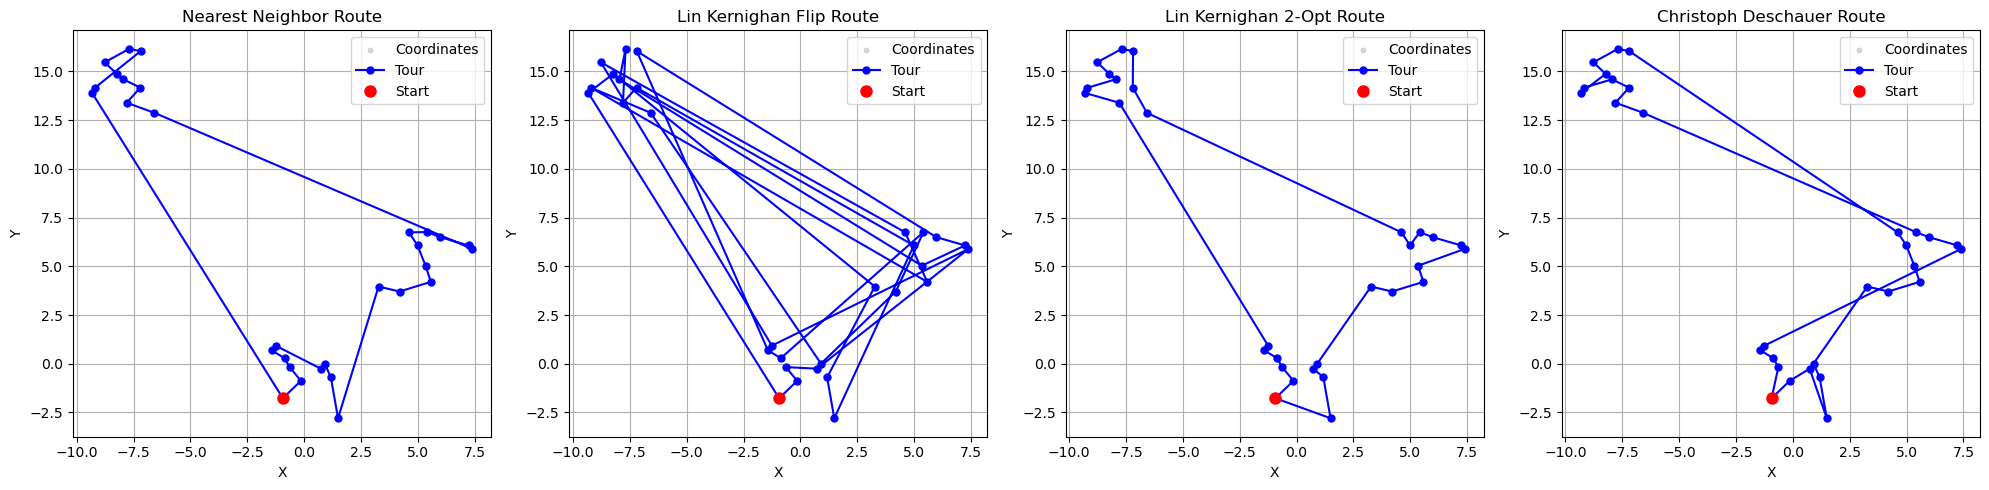

In [ ]:
def plot_route(ax, route, coordinates, method_name):
    coordinates = np.array(coordinates)
    x = coordinates[:, 0]
    y = coordinates[:, 1]
    route = np.array(route, dtype=int)

    # Plot the coordinates in a light color for clarity
    ax.scatter(x, y, color='lightgray', s=10, label="Coordinates")
    
    # Plot the route with a distinct color (e.g., blue) and a larger line width
    ax.plot(x[route], y[route], '-o', color='blue', label='Tour', markersize=5)
    
    # Highlight the start point with a different color (e.g., red)
    ax.plot(x[route[0]], y[route[0]], 'ro', markersize=8, label="Start")
    
    ax.set_title(f"{method_name} Route") 
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()
    ax.grid(True)

fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns

# Use the plot_route function for each subplot, passing the axes
plot_route(axs[0], p1, coordinates, "Nearest Neighbor")
plot_route(axs[1], p2, coordinates, "Lin Kernighan Flip")
plot_route(axs[2], p3, coordinates, "Lin Kernighan 2-Opt")
plot_route(axs[3], p4, coordinates, "Christoph Deschauer")

# Adjust layout
plt.tight_layout()
plt.show()

Time complexity

In [ ]:
import random
import csv

file_path = '../dataset/Github/large.csv'
coordinates = hsm.get_coordinates_kaggle(file_path)

o_list = []
t_list = []
n_values = []

for n in range(10, 210, 10):
    random.seed(42)
    indices = random.sample(range(len(coordinates)), n)
    selected_coordinates = coordinates[indices]
    
    # Compute the distance matrix for the selected coordinates
    dist_matrix = hsm.get_distance_matrix(selected_coordinates)
    
    # Perform nearest neighbor analysis
    o1, p1, t1 = hsm.Nearest_Neighbor(dist_matrix)
    o2, p2, t2 = hsm.Lin_Kernighan_Flip(dist_matrix)
    o3, p3, t3 = hsm.Lin_Kernighan_k_Opt(dist_matrix, 2)
    o4, p4, t4 = hsm.Christoph_Deschauer(dist_matrix)

    o_list.append([o1, o2, o3, o4])
    t_list.append([t1, t2, t3, t4])
    n_values.append(n)


o_array = np.array(o_list)
t_array = np.array(t_list)
n_array = np.array(n_values).reshape(-1, 1)
result_array = np.hstack([n_array, o_array, t_array])

save_path = '../results/heurstics_t_and_o.csv'
header = ['n', 'o_NearestNeighbor', 'o_LKFlip', 'o_LK2Opt', 'o_ChristophDeschauer', 
          't_NearestNeighbor', 't_LKFlip', 't_LK2Opt', 't_ChristophDeschauer']

with open(save_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header) 
    writer.writerows(result_array)

print(f"Results saved to {save_path}")

KeyboardInterrupt: 

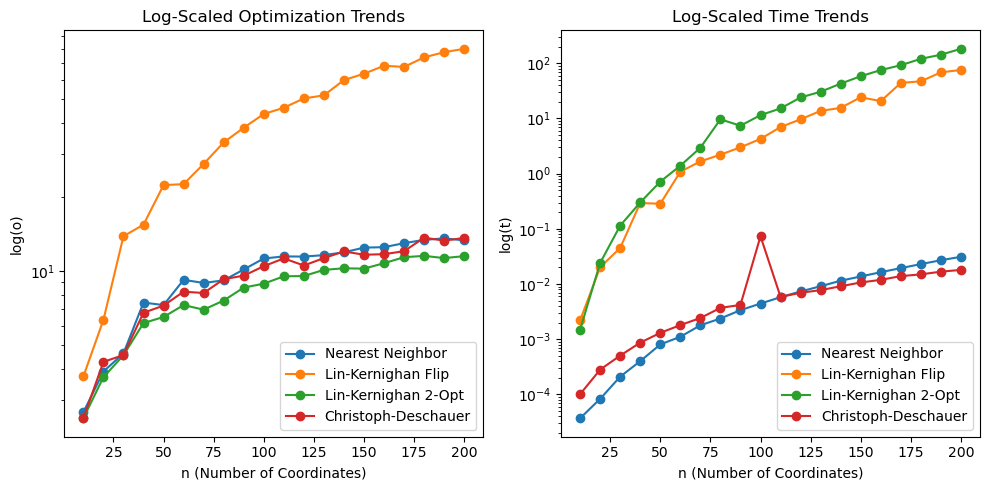

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

o_array = np.array(o_list)
t_array = np.array(t_list)

plt.figure(figsize=(10, 5))

# Plot for "o" values (log scale on y-axis)
plt.subplot(1, 2, 1)
plt.semilogy(n_values, o_array[:, 0], label="Nearest Neighbor", marker='o')
plt.semilogy(n_values, o_array[:, 1], label="Lin-Kernighan Flip", marker='o')
plt.semilogy(n_values, o_array[:, 2], label="Lin-Kernighan 2-Opt", marker='o')
plt.semilogy(n_values, o_array[:, 3], label="Christoph-Deschauer", marker='o')
plt.xlabel('n (Number of Coordinates)')
plt.ylabel('log(o)')
plt.title('Log-Scaled Optimization Trends')
plt.legend()

# Plot for "t" values (log scale on y-axis)
plt.subplot(1, 2, 2)
plt.semilogy(n_values, t_array[:, 0], label="Nearest Neighbor", marker='o')
plt.semilogy(n_values, t_array[:, 1], label="Lin-Kernighan Flip", marker='o')
plt.semilogy(n_values, t_array[:, 2], label="Lin-Kernighan 2-Opt", marker='o')
plt.semilogy(n_values, t_array[:, 3], label="Christoph-Deschauer", marker='o')
plt.xlabel('n (Number of Coordinates)')
plt.ylabel('log(t)')
plt.title('Log-Scaled Time Trends')
plt.legend()

plt.tight_layout()
plt.show()


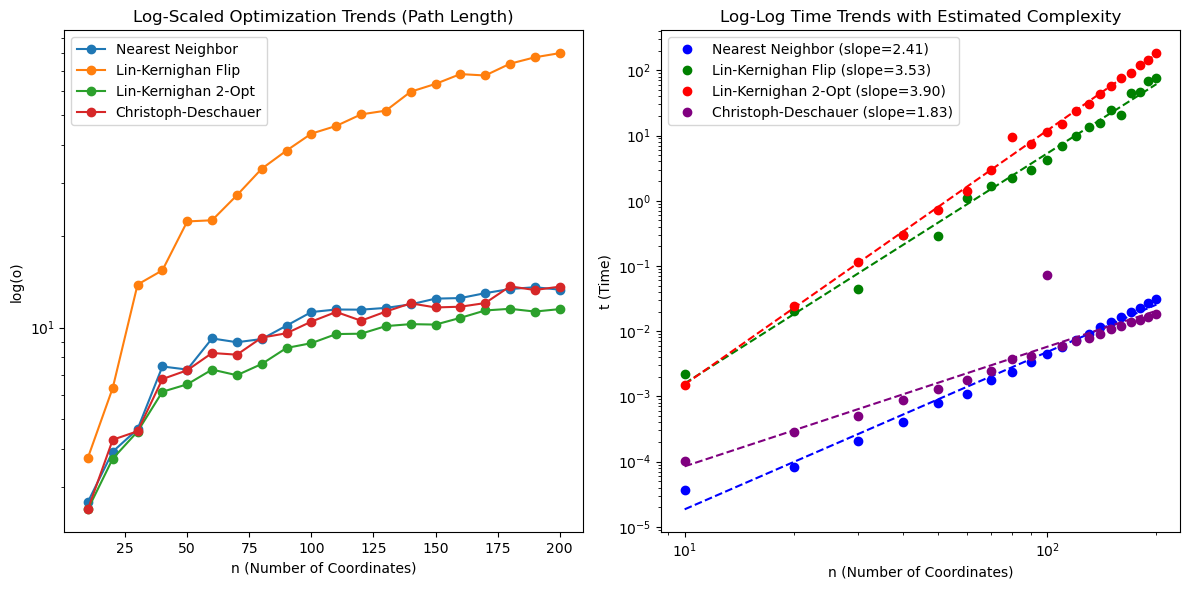

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress 

o_array = np.array(o_list)
t_array = np.array(t_list)

n_values = np.array(n_values)

plt.figure(figsize=(12, 6))

# Plot for "o" values (log scale on y-axis)
plt.subplot(1, 2, 1)
for i, label in enumerate(["Nearest Neighbor", "Lin-Kernighan Flip", "Lin-Kernighan 2-Opt", "Christoph-Deschauer"]):
    plt.semilogy(n_values, o_array[:, i], marker='o', label=label)
plt.xlabel('n (Number of Coordinates)')
plt.ylabel('log(o)')
plt.title('Log-Scaled Optimization Trends (Path Length)')
plt.legend()

# Plot for "t" values (log-log plot + fit line)
plt.subplot(1, 2, 2)
colors = ['b', 'g', 'r', 'purple']
for i, label in enumerate(["Nearest Neighbor", "Lin-Kernighan Flip", "Lin-Kernighan 2-Opt", "Christoph-Deschauer"]):
    # log-log transform
    log_n = np.log10(n_values)
    log_t = np.log10(t_array[:, i])

    # linear regression
    slope, intercept, r_value, p_value, std_err = linregress(log_n, log_t)

    plt.plot(n_values, t_array[:, i], marker='o', linestyle='', color=colors[i], label=f"{label} (slope={slope:.2f})")
    fit_line = 10**(intercept) * n_values**slope
    plt.plot(n_values, fit_line, linestyle='--', color=colors[i])

plt.xscale('log')
plt.yscale('log')
plt.xlabel('n (Number of Coordinates)')
plt.ylabel('t (Time)')
plt.title('Log-Log Time Trends with Estimated Complexity')
plt.legend()

plt.tight_layout()
plt.show()


Stability (randomly select nodes but fix starting point)

In [ ]:
import csv
import pandas as pd

file_path = '../dataset/Github/large.csv'
coordinates = hsm.get_coordinates_kaggle(file_path)

o_list = []
t_list = []
n_values = []

for n in range(10, 110, 10):
    for seed in range(40, 46):
        random.seed(seed)
        indices = random.sample(range(len(coordinates)), n)
        selected_coordinates = coordinates[indices]
        
        # Compute the distance matrix for the selected coordinates
        dist_matrix = hsm.get_distance_matrix(selected_coordinates)
        
        # Perform nearest neighbor analysis
        o1, p1, t1 = hsm.Nearest_Neighbor(dist_matrix)
        o2, p2, t2 = hsm.Lin_Kernighan_Flip(dist_matrix)
        o3, p3, t3 = hsm.Lin_Kernighan_k_Opt(dist_matrix, 2)
        o4, p4, t4 = hsm.Christoph_Deschauer(dist_matrix)

        o_list.append([o1, o2, o3, o4])
        t_list.append([t1, t2, t3, t4])
        n_values.append(n)


o_array = np.array(o_list)  # shape: (60, 4)  6 seeds × 10 n_values
t_array = np.array(t_list)
n_array = np.array(n_values)

df_list = []

for n in sorted(set(n_array)):
    idx = (n_array == n)
    
    o_n = o_array[idx]  # shape: (6, 4)
    t_n = t_array[idx]
    
    row = {
        'n': n,
        'o_NearestNeighbor_mean': np.mean(o_n[:, 0]),
        'o_NearestNeighbor_std': np.std(o_n[:, 0]),
        'o_LKFlip_mean': np.mean(o_n[:, 1]),
        'o_LKFlip_std': np.std(o_n[:, 1]),
        'o_LK2Opt_mean': np.mean(o_n[:, 2]),
        'o_LK2Opt_std': np.std(o_n[:, 2]),
        'o_ChristophDeschauer_mean': np.mean(o_n[:, 3]),
        'o_ChristophDeschauer_std': np.std(o_n[:, 3]),
        't_NearestNeighbor_mean': np.mean(t_n[:, 0]),
        't_NearestNeighbor_std': np.std(t_n[:, 0]),
        't_LKFlip_mean': np.mean(t_n[:, 1]),
        't_LKFlip_std': np.std(t_n[:, 1]),
        't_LK2Opt_mean': np.mean(t_n[:, 2]),
        't_LK2Opt_std': np.std(t_n[:, 2]),
        't_ChristophDeschauer_mean': np.mean(t_n[:, 3]),
        't_ChristophDeschauer_std': np.std(t_n[:, 3]),
    }
    df_list.append(row)

df_result = pd.DataFrame(df_list)
save_path = '../results/tsp_stability_multirun_results.csv'
df_result.to_csv(save_path, index=False)

print(f"Mean/std results saved to {save_path}")

Mean/std results saved to /Users/zhangjiyao/Documents/Upenn/AMCS6036GroupProject/GithubData/data/tsp_stability_multirun_results.csv


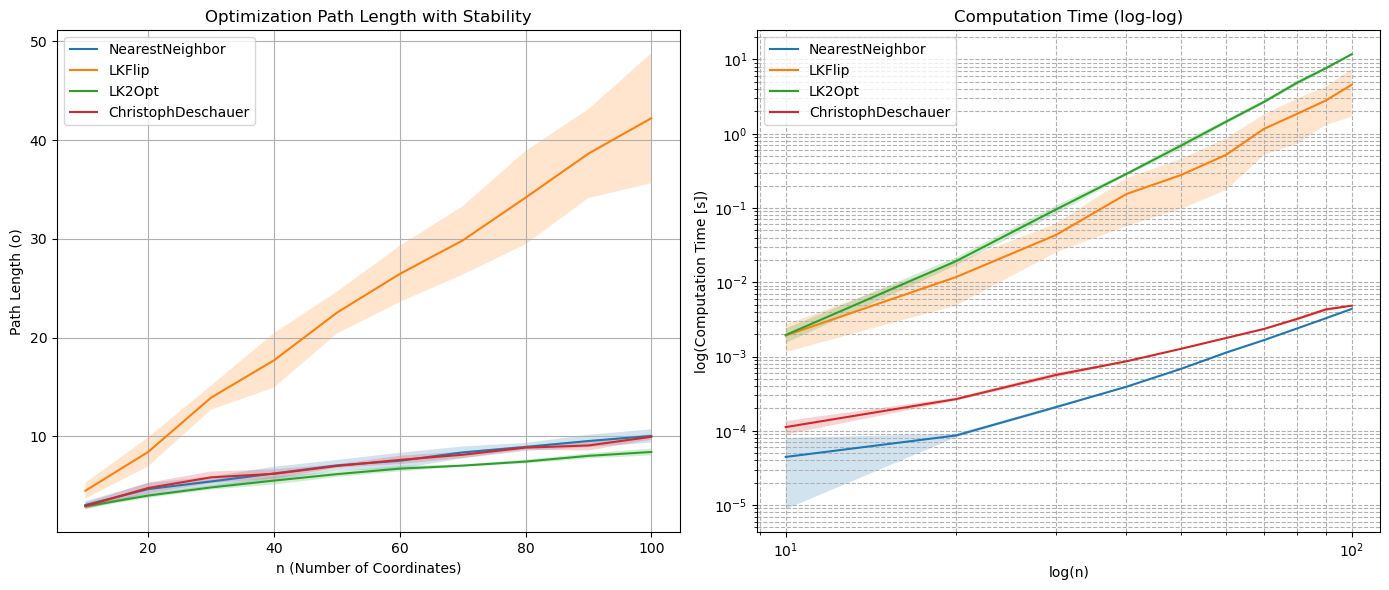

In [ ]:
import matplotlib.pyplot as plt

# df_result = pd.read_csv('/Users/zhangjiyao/Documents/Upenn/AMCS6036GroupProject/GithubData/data/tsp_stability_results.csv')

n = df_result['n']

methods = ['NearestNeighbor', 'LKFlip', 'LK2Opt', 'ChristophDeschauer']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for method in methods:
    mean = df_result[f'o_{method}_mean']
    std = df_result[f'o_{method}_std']
    plt.plot(n, mean, label=f'{method}')
    plt.fill_between(n, mean - std, mean + std, alpha=0.2)

plt.xlabel('n (Number of Coordinates)')
plt.ylabel('Path Length (o)')
plt.title('Optimization Path Length with Stability')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for method in methods:
    mean = df_result[f't_{method}_mean']
    std = df_result[f't_{method}_std']
    plt.plot(n, mean, label=f'{method}')
    plt.fill_between(n, mean - std, mean + std, alpha=0.2)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('log(n)')
plt.ylabel('log(Computation Time [s])')
plt.title('Computation Time (log-log)')
plt.legend()
plt.grid(True, which='both', ls='--')

plt.tight_layout()
plt.show()


Random nodes (select same node but random select starting points)

In [ ]:
import random
import csv

file_path = '../dataset/Github/large.csv'
coordinates = hsm.get_coordinates_kaggle(file_path)

o_list = []
t_list = []
n_values = []
start_nodes = []

for n in range(10, 110, 10):
    random.seed(42)
    indices = random.sample(range(len(coordinates)), n)
    selected_coordinates = coordinates[indices]
    
    dist_matrix = hsm.get_distance_matrix(selected_coordinates)
    
    for i in range(5): 
        # randomly choose a starting node
        startnode = random.randint(0, n-1) 
        
        # Perform TSP heuristic analyses
        o1, p1, t1 = hsm.Nearest_Neighbor(dist_matrix, start_node=startnode)
        o2, p2, t2 = hsm.Lin_Kernighan_Flip(dist_matrix, start_node=startnode)
        o3, p3, t3 = hsm.Lin_Kernighan_k_Opt(dist_matrix, 2, start_node=startnode)
        o4, p4, t4 = hsm.Christoph_Deschauer(dist_matrix, start_node=startnode)

        o_list.append([o1, o2, o3, o4])
        t_list.append([t1, t2, t3, t4])
        n_values.append(n)
        start_nodes.append(startnode)

o_array = np.array(o_list)
t_array = np.array(t_list)
n_array = np.array(n_values).reshape(-1, 1)
start_array = np.array(start_nodes).reshape(-1, 1)

result_array = np.hstack([n_array, start_array, o_array, t_array])

save_path = '../results/heuristics_random_startnode_results.csv'
header = ['n', 'start_node', 
          'o_NearestNeighbor', 'o_LKFlip', 'o_LK2Opt', 'o_ChristophDeschauer', 
          't_NearestNeighbor', 't_LKFlip', 't_LK2Opt', 't_ChristophDeschauer']

with open(save_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(result_array)

print(f"Results saved to {save_path}")


NameError: name 'csv' is not defined

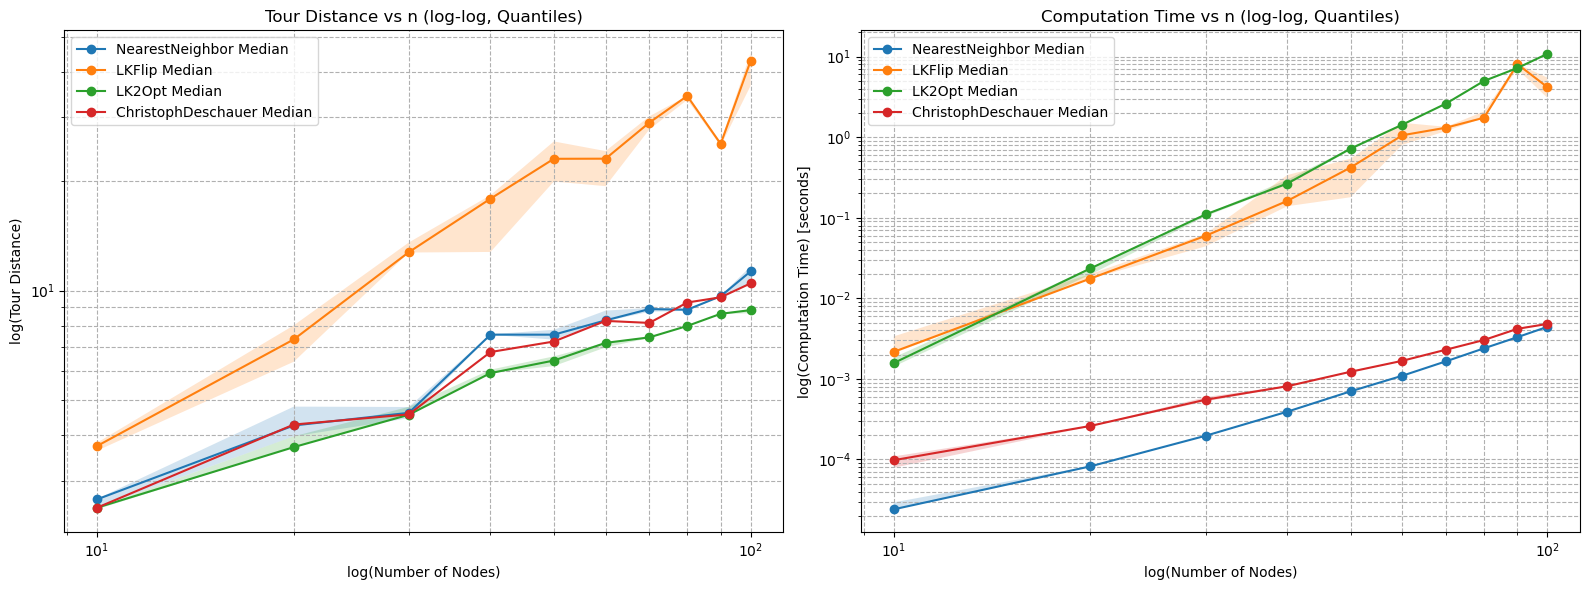

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

save_path = '../results/heuristics_random_startnode_results.csv'
df = pd.read_csv(save_path)

algo_names = ["NearestNeighbor", "LKFlip", "LK2Opt", "ChristophDeschauer"]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax = axes[0]
for algo in algo_names:
    grouped = df.groupby('n')[f'o_{algo}']
    median_curve = grouped.median()
    q25 = grouped.quantile(0.25)
    q75 = grouped.quantile(0.75)

    ax.plot(median_curve.index, median_curve.values, label=f'{algo} Median', marker='o')
    ax.fill_between(median_curve.index, q25, q75, alpha=0.2)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('log(Number of Nodes)')
ax.set_ylabel('log(Tour Distance)')
ax.set_title('Tour Distance vs n (log-log, Quantiles)')
ax.grid(True, which="both", ls="--")
ax.legend()

ax = axes[1]
for algo in algo_names:
    grouped = df.groupby('n')[f't_{algo}']
    median_curve = grouped.median()
    q25 = grouped.quantile(0.25)
    q75 = grouped.quantile(0.75)

    ax.plot(median_curve.index, median_curve.values, label=f'{algo} Median', marker='o')
    ax.fill_between(median_curve.index, q25, q75, alpha=0.2)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('log(Number of Nodes)')
ax.set_ylabel('log(Computation Time) [seconds]')
ax.set_title('Computation Time vs n (log-log, Quantiles)')
ax.grid(True, which="both", ls="--")
ax.legend()

plt.tight_layout()
plt.show()



In [ ]:
import random
import csv
import numpy as np
import matplotlib.pyplot as plt

file_path = '../dataset/Github/large.csv'
coordinates = hsm.get_coordinates_kaggle(file_path)

o_list = []
t_list = []
start_nodes = []

# iterate different n
for n in range(1, 20):
    indices = random.sample(range(len(coordinates)), 100) 
    selected_coordinates = coordinates[indices]
    
    dist_matrix = hsm.get_distance_matrix(selected_coordinates)
    
    startnode = random.randint(0, n-1) 
    
    o1, p1, t1 = hsm.Nearest_Neighbor(dist_matrix, start_node=startnode)
    o2, p2, t2 = hsm.Lin_Kernighan_Flip(dist_matrix, start_node=startnode)
    o3, p3, t3 = hsm.Lin_Kernighan_k_Opt(dist_matrix, 2, start_node=startnode)
    o4, p4, t4 = hsm.Christoph_Deschauer(dist_matrix, start_node=startnode)

    o_list.append([o1, o2, o3, o4])
    t_list.append([t1, t2, t3, t4])
    start_nodes.append(startnode)

o_array = np.array(o_list)
t_array = np.array(t_list)
start_array = np.array(start_nodes).reshape(-1, 1)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 10 and the array at index 1 has size 19

Results saved to ../results/heuristics_random_startnode_results.csv


C:\Users\Jiyao Zhang\AppData\Local\Temp\ipykernel_26080\857708533.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([o_array[:, i] for i in range(4)], labels=algo_names, patch_artist=True)
C:\Users\Jiyao Zhang\AppData\Local\Temp\ipykernel_26080\857708533.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([t_array[:, i] for i in range(4)], labels=algo_names, patch_artist=True)


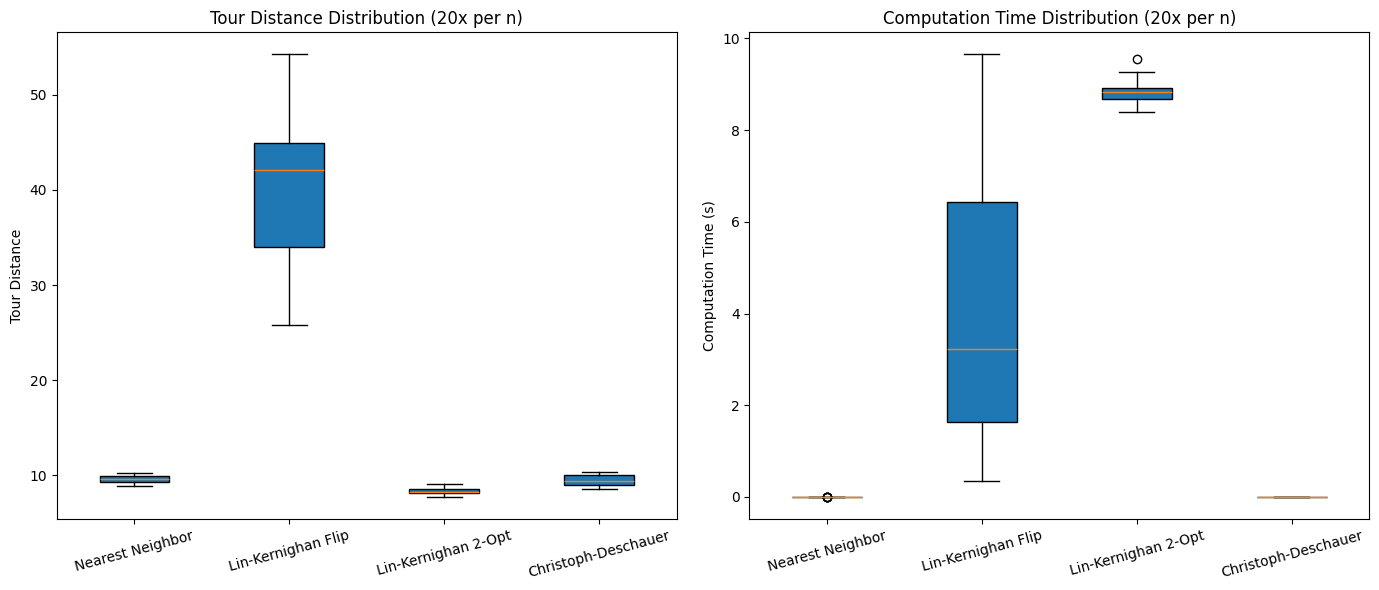

In [13]:
result_array = np.hstack([start_array, o_array, t_array])

save_path = '../results/heuristics_random_startnode_results.csv'
header = ['n', 'start_node', 
          'o_NearestNeighbor', 'o_LKFlip', 'o_LK2Opt', 'o_ChristophDeschauer', 
          't_NearestNeighbor', 't_LKFlip', 't_LK2Opt', 't_ChristophDeschauer']

with open(save_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(result_array)

print(f"Results saved to {save_path}")

algo_names = ["Nearest Neighbor", "Lin-Kernighan Flip", "Lin-Kernighan 2-Opt", "Christoph-Deschauer"]

plt.figure(figsize=(14, 6))

# Tour Distance
plt.subplot(1, 2, 1)
plt.boxplot([o_array[:, i] for i in range(4)], labels=algo_names, patch_artist=True)
plt.ylabel('Tour Distance')
plt.title('Tour Distance Distribution (20x per n)')
plt.xticks(rotation=15)

# Computation Time
plt.subplot(1, 2, 2)
plt.boxplot([t_array[:, i] for i in range(4)], labels=algo_names, patch_artist=True)
plt.ylabel('Computation Time (s)')
plt.title('Computation Time Distribution (20x per n)')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

In [20]:
print(t_array[:, 0])

[0.00500011 0.00399852 0.00399327 0.00400019 0.00300312 0.00400162
 0.00400305 0.0039978  0.00399733 0.00300026 0.00400138 0.00400281
 0.00399756 0.004004   0.00399733 0.00300193 0.00400019 0.00299931
 0.00399876]
